# 상관분석

## #01. 작업준비

### 패키지 가져오기

In [1]:
import numpy as np
from pandas import read_excel
from scipy import stats

import sys
import seaborn as sb
from matplotlib import pyplot as plt

### 데이터 가져오기

In [2]:
df = read_excel("https://data.hossam.kr/E03/point.xlsx")
df

,언어영역,수리영역
0,392,428
1,404,518
2,346,376
3,382,426
4,368,409
5,449,490
6,391,448


## #02. 탐색적 데이터 분석

### 산점도 그래프를 통한 상관정도 분석

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df.columns

Index(['언어영역', '수리영역'], dtype='object')

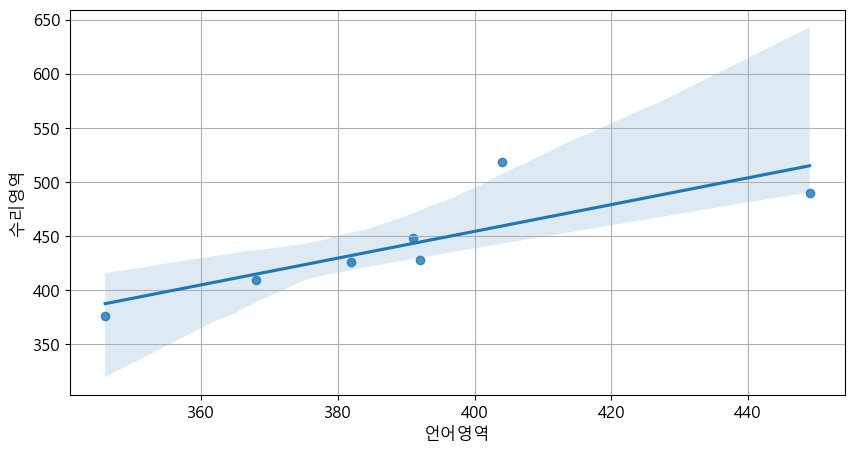

In [6]:
# sb.scatterplot(data=df, x='언어영역', y='수리영역')   #산점도만
sb.regplot(data=df, x='언어영역', y='수리영역') #산점도+추세선
plt.grid()
plt.show()
plt.close()

## #03. 공분산

공분산은 `상관관계의 상승 혹은 하강하는 경향을 이해`할 수는 있으나 2개 변수의 측정 단위의 크기에 따라 값이 달라지므로 `절대적 정도를 파악하기에는 한계`가 있다.

결과값이 양수면 정비례, 음수면 반비례

>그래서 잘 안쓴다.

In [7]:
np.cov(df['언어영역'], df['수리영역'])[0, 1]

1271.9523809523807

## #04. 상관분석

### numpy를 통한 상관계수 구하기

`p-value`는 알 수 없기 때문에 분석 결과를 검정할 수 없다.

In [9]:
np.corrcoef(df['언어영역'], df['수리영역'])[0,1]    #0행 1열이 상관계수

0.821064207442306

### 피어슨 상관계수와 `p-value` 구하기

In [10]:
r,p = stats.pearsonr(df['언어영역'],df['수리영역'])
"상관계수 : %f, p-value : %f"%(r,p)

'상관계수 : 0.821064, p-value : 0.023564'

#### 결과 해석

결과의 `상관계수`의 값이 `0.821`, `p-value(유의수준)`값이 `0.024`로 0.05보다 작으므로 `귀무가설을 기각`하고 `대립가설을 채택`한다. 그러므로 언어영역 점수와 수리영역 점수는 상관이 있다.